In [1]:
import sys
from os.path import expanduser
home = expanduser("~")

sys.path.append(home+'/repos/ClusNet/code/modules/')

from ClusNet import Cluster
from ClusNet import model as m
from ClusNet import dataset as ds

# matplotlib
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import colors

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# statistics
import numpy as np
from scipy import signal

# object support
import copy

# time keeping
import time
from datetime import timedelta

# data munging
import random, string
import pandas as pd

# operating system
import os
import glob
# tensorflow
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# keras support
from keras.models import model_from_yaml
import keras
import glob
from os.path import expanduser
home = expanduser("~")

import numpy as np
import random
from scipy import ndimage
from scipy.ndimage import gaussian_filter

label_size = 12
mpl.rcParams['legend.fontsize'] = label_size
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

In [11]:
clusglob = glob.glob('../../data/eROSITA_no_background/*.fits')
clusfpath = random.choice(clusglob)
x = Cluster.Cluster(fpath=clusfpath)
agns = x.add_agn(num=2)
mask = x.get_mask()
print(mask.shape)

(384, 384)


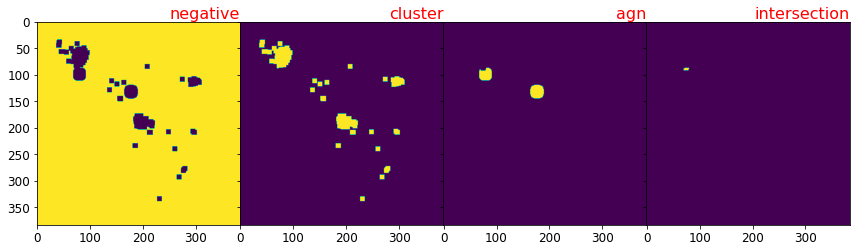

In [12]:
cmaps = [plt.cm.viridis] * 4
labels = ['negative','cluster','agn','intersection']

fig, ax = plt.subplots(figsize=(12,5),
                       nrows=1,
                       ncols=4,
                       sharex=True,
                       sharey=True)

for i, cmap, label in zip({0,1,2,3},cmaps,labels):
    map_ = (mask==i)*1
    ax[i].imshow(map_,cmap=cmap,interpolation=None)
    ax[i].annotate(label, xy=(1, 1), xycoords='axes fraction', fontsize=16,
                horizontalalignment='right', verticalalignment='bottom',color='red')
#    ax[i].set_xlim(150,250)
#    ax[i].set_ylim(150,250)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.show()
plt.close()

In [13]:
classes = x.get_mask()
print(set(classes.flatten()))
print(classes)

{0, 1, 2, 3}
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<ipython-input-16-01a955306f18>:4: RuntimeWarning: divide by zero encountered in log10
  im = ax[0].imshow(np.log10(x.image),interpolation='none',cmap=cmap)


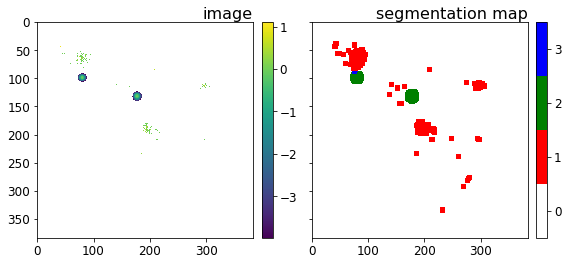

In [16]:
fig,ax = plt.subplots(figsize=(8,8),ncols=2,nrows=1,sharex=True,sharey=True)

cmap = plt.cm.viridis
im = ax[0].imshow(np.log10(x.image),interpolation='none',cmap=cmap)
ax[0].annotate('image', xy=(1, 1), xycoords='axes fraction', fontsize=16,
                horizontalalignment='right', verticalalignment='bottom',color='black')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.12)
plt.colorbar(im, cax=cax)

ax[-1].annotate('segmentation map', xy=(1, 1), xycoords='axes fraction', fontsize=16,
                horizontalalignment='right', verticalalignment='bottom',color='black')

cmap = mpl.colors.ListedColormap(['white', 'red','green','blue'])
bounds = [-0.5,0.5,1.5,2.5,3.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

im = ax[-1].imshow(classes, interpolation='none',cmap=cmap)

divider = make_axes_locatable(ax[-1])
cax = divider.append_axes("right", size="5%", pad=0.12)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, ticks=[0,1,2,3])

plt.tight_layout()
plt.subplots_adjust()
plt.show()
plt.close()

In [ ]:
for i in range(10):
    Chandra_image = image_list[i].numpy()
    
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.title('eRosita')
    plt.imshow(np.log10(20*eRosita_image[:,:,0] + 1))
    plt.colorbar()
    plt.show()
    plt.close()
    plt.subplot(2, 1, 2)
    
    plt.figure()
    plt.title('Chandra')
    plt.imshow(np.log10(20*Chandra_image[:,:,0] + 1))
    plt.colorbar()
    plt.show()
    plt.close()